In [154]:
'''A technical report containing implementation details
(algorithm, initial settings such as sampling the parameters k0,k1 from some distribution, 
parameter updates on epochs, 
ﬁnal parameter values at the end of training,
train vs test loss,
train and test accuracy, 
F1-Score,
plot of the loss function vs. epochs, 
Code base hosted on github linked in the report)–--Maximum 3 pages
• Grid search/brute force NOT allowed
• Data Sets for experiments and results: Bank-Note (Internship Candidates)
• Data Sets for experiments and results: Bank-Note, Iris, MNIST (Junior Data Scientist Positions'''

'A technical report containing implementation details\n(algorithm, initial settings such as sampling the parameters k0,k1 from some distribution, \nparameter updates on epochs, \nﬁnal parameter values at the end of training,\ntrain vs test loss,\ntrain and test accuracy, \nF1-Score,\nplot of the loss function vs. epochs, \nCode base hosted on github linked in the report)–--Maximum 3 pages\n• Grid search/brute force NOT allowed\n• Data Sets for experiments and results: Bank-Note (Internship Candidates)\n• Data Sets for experiments and results: Bank-Note, Iris, MNIST (Junior Data Scientist Positions'

In [1]:
# fit a simple mlp model on the banknote and review learning curves
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix


In [2]:
# load the dataset
df = pd.read_csv("BankNote_Authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [92]:
X = df.values[:, :-1]
X

array([[  3.62,   8.67,  -2.81,  -0.45],
       [  4.55,   8.17,  -2.46,  -1.46],
       [  3.87,  -2.64,   1.92,   0.11],
       ...,
       [ -3.75, -13.46,  17.59,  -2.78],
       [ -3.56,  -8.38,  12.39,  -1.28],
       [ -2.54,  -0.66,   2.68,   1.2 ]])

In [93]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

In [94]:
# ensure all data are floating point values
X = X.astype('float32')

In [95]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [96]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [97]:
# determine the number of input features
n_features = X.shape[1]

In [98]:
# define model

model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

In [99]:
# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

In [100]:
print(X_train.shape, y_train.shape)

(823, 4) (823,)


In [101]:
# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test,y_test))

In [102]:
import warnings

# predict test set
yhat = model.predict_classes(X_test)


C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [103]:
model.evaluate(X_train,y_train)

26/26 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9830


[0.0841645896434784, 0.9829890727996826]

In [104]:
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.987


Confusion matrix, without normalization
[[304   6]
 [  1 238]]


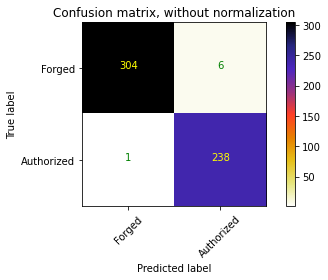

In [106]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.CMRmap_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Forged','Authorized'],
                      title='Confusion matrix, without normalization')


In [107]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  304
False Positives:  6
False Negatives:  1
True Positives:  238


In [108]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy :",format(Accuracy))

Accuracy : 98.72495446265938


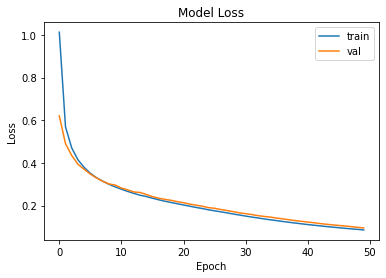

In [109]:
# plot learning curves
pyplot.title('Model Loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

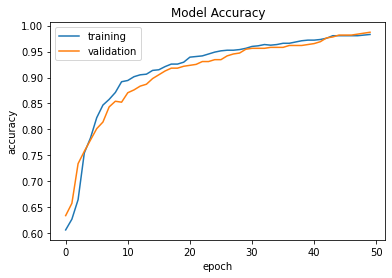

In [110]:
plt.plot(history.history['accuracy'],label= 'train')
plt.plot(history.history['val_accuracy'],label='val')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()